<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/8OtherClasses/%E7%89%A9%E7%90%86%E5%8C%96%E5%AD%A656.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stirling公式のチェック

(100.0, 120.0)

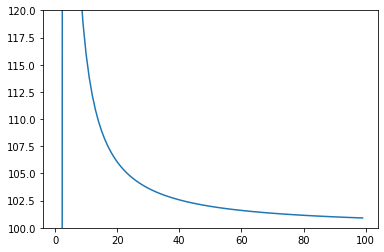

In [ ]:
from math import log
import numpy as np

def factorial(x):
    if x < 1:
        return 1
    return x*factorial(x-1)

X = []
Y1 = []
Y2 = []
Y3 = []
for i in range(1,100):
    X.append(i)
    Y1.append(i*log(i)-i)
    Y2.append(log(factorial(i)))
    Y3.append(log(factorial(i)) / (i*log(i)-i))

Y3 = np.array(Y3)
import matplotlib.pyplot as plt
plt.plot(X,Y3*100)
plt.ylim(100,120)
# plt.plot(X,Y2)


振動数から特性温度を算出する。

In [ ]:
h = 6.62607e-34
c = 299792458.00
k = 1.38065e-23
N = 6.022e23
R = N*k
def θv(nu):
    """nu in cm-1"""
    nu *= c*100
    return h*nu/k

θv(2358)/2358

1.4387758028320428

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

T = np.linspace(100.,1000.,91)
T

array([ 100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,  180.,
        190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,  270.,
        280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,  360.,
        370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,  450.,
        460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,  540.,
        550.,  560.,  570.,  580.,  590.,  600.,  610.,  620.,  630.,
        640.,  650.,  660.,  670.,  680.,  690.,  700.,  710.,  720.,
        730.,  740.,  750.,  760.,  770.,  780.,  790.,  800.,  810.,
        820.,  830.,  840.,  850.,  860.,  870.,  880.,  890.,  900.,
        910.,  920.,  930.,  940.,  950.,  960.,  970.,  980.,  990.,
       1000.])

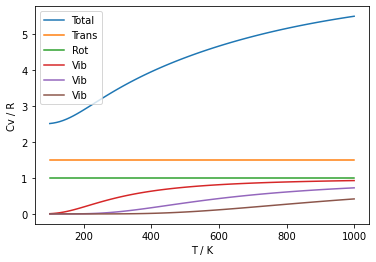

In [ ]:
from numpy import exp

def Cv_vib(theta_over_T):
    x = theta_over_T
    return R*x**2*exp(-x)/(1-exp(-x))**2

Cv_trans = 3*R/2
Cv_rot   = R      # 直線分子

# assume CO2
Cv = Cv_trans + Cv_rot + 2*Cv_vib(θv(667)/T) + Cv_vib(θv(1388)/T) + Cv_vib(θv(2349)/T)
plt.plot(T, Cv/R, label="Total")
Cv = Cv_trans + np.zeros_like(T)
plt.plot(T, Cv/R, label="Trans")
Cv = Cv_rot   + np.zeros_like(T)
plt.plot(T, Cv/R, label="Rot")
Cv = Cv_vib(θv(667)/T)
plt.plot(T, Cv/R, label="Vib")
Cv = Cv_vib(θv(1388)/T)
plt.plot(T, Cv/R, label="Vib")
Cv = Cv_vib(θv(2349)/T)
plt.plot(T, Cv/R, label="Vib")
plt.xlabel("T / K")
plt.ylabel("Cv / R")
plt.legend()
plt.savefig("/content/drive/MyDrive/cv_gas.svg",bbox="tight")

## 課題F1(b)の図示



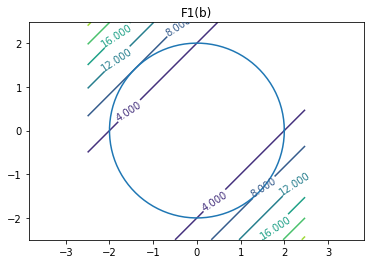

In [4]:
# [-2.5,+2.5]の範囲だけを描く。
# matplotlibのサンプルをコピペし、関数だけさしかえる。
# https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# tacos surface
delta = 0.025
x = np.arange(-2.5, 2.5, delta)
y = np.arange(-2.5, 2.5, delta)
X, Y = np.meshgrid(x, y)
f = (X-Y)**2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, f)
ax.axis('equal')
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('F1(b)')

# circle of radius 2
t = np.linspace(0, 2*np.pi, 100)
x = 2*np.cos(t)
y = 2*np.sin(t)
ax.plot(x,y, '-')
